In [27]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_openml

In [28]:
mnist=fetch_openml('mnist_784', version=1, cache=True)


In [29]:
type(mnist)

sklearn.utils.Bunch

In [30]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [31]:
x = mnist['data']
y = mnist['target']

In [32]:
x.to_numpy()[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [33]:
y.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

In [34]:
y.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

### split the data into two

In [35]:
x_train, x_test, y_train,y_test = x[:60000], x[60000:],y[:60000],y[60000:]

In [36]:
y_train = y_train.astype(np.int8)

### shift functions

In [37]:
from scipy.ndimage.interpolation import shift

C:\Users\DELL\AppData\Local\Temp\ipykernel_7524\987197595.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [38]:
def shift_image_right(image, num_pixels):
    shifted_image = shift(image, (0, num_pixels), cval=0)
    return shifted_image

def shift_image_left(image, num_pixels):
    shifted_image = shift(image, (0, -num_pixels), cval=0)
    return shifted_image

def shift_image_up(image, num_pixels):
    shifted_image = shift(image, (-num_pixels, 0), cval=0)
    return shifted_image

def shift_image_down(image, num_pixels):
    shifted_imagedw = shift(image, (num_pixels, 0), cval=0)
    return shifted_imagedw

In [39]:
x_rshift = shift_image_right(x_train,1)
x_lshift = shift_image_left(x_train,1)
x_ushift = shift_image_up(x_train,1)
x_dshift = shift_image_down(x_train,1)

In [40]:
pd.DataFrame(x_rshift)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,-6.050559e-63,2.484492e-64,-7.705281e-63,-1.926006e-62,4.098996e-62,-1.641467e-61,-6.704701e-63,-4.631871e-60,1.666729e-59,...,-2.650094e-33,-1.642508e-33,-1.206340e-34,6.670655e-35,1.261862e-36,6.486907e-36,-1.261013e-37,-1.050304e-37,7.602508e-38,-5.801061e-38
1,0.0,2.033891e-63,-7.554452e-63,-2.894142e-62,-1.173355e-61,1.676859e-61,4.967257e-61,3.446125e-60,2.367917e-59,3.625433e-59,...,2.121610e-32,4.689517e-33,-1.166673e-33,-3.117138e-34,9.738101e-38,-1.367638e-35,-1.046723e-35,-4.451920e-36,-1.720482e-37,2.030371e-37
2,0.0,2.404680e-62,-1.013992e-62,-3.696616e-62,-3.087216e-61,-1.334035e-60,-1.667181e-60,1.422577e-59,1.140301e-58,1.270633e-58,...,-1.646441e-31,-2.809336e-32,-1.071641e-32,-8.781889e-34,1.698767e-34,3.016301e-35,1.369949e-36,4.683762e-37,-1.174584e-36,-5.660588e-37
3,0.0,6.829320e-62,4.082153e-62,-1.537916e-61,-7.091519e-61,-1.676862e-60,-1.560856e-59,-4.541398e-59,1.275667e-58,-2.657164e-58,...,-7.724205e-31,-1.892945e-31,-1.114558e-32,-3.012582e-33,-1.455995e-33,-5.041987e-34,-1.443474e-34,-1.679373e-35,-1.116336e-35,-5.508985e-36
4,0.0,-6.540072e-64,-1.531462e-61,-8.685036e-62,3.300905e-60,4.307675e-60,-8.525096e-59,-3.503247e-58,3.713855e-58,1.254421e-57,...,-7.932661e-31,-3.963316e-31,-4.807934e-32,-1.118194e-32,-5.583831e-33,-2.064288e-33,-5.779131e-34,3.168935e-35,3.339395e-36,-9.499977e-36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,9.714228e-59,-1.104712e-58,2.612408e-59,-1.109189e-57,3.773397e-57,-1.398440e-56,-2.690031e-55,7.041810e-56,-9.423559e-56,...,3.724615e-40,1.404305e-43,-8.383372e-43,2.982175e-43,1.769836e-42,5.033417e-43,1.851996e-44,1.655383e-44,6.655674e-45,3.732077e-46
59996,0.0,-1.175860e-58,-6.101411e-58,-1.105961e-57,-1.153417e-56,-1.393208e-56,5.706672e-56,-2.551179e-55,-9.695691e-56,4.558128e-54,...,1.915220e-41,3.278229e-43,-4.417431e-43,-3.208815e-43,2.749251e-43,4.199171e-44,-3.809182e-44,4.402371e-45,1.258270e-45,-2.558513e-46
59997,0.0,-1.219890e-57,-1.113076e-57,-1.153320e-56,-5.471201e-56,-1.876461e-55,3.974648e-55,-9.715228e-56,-6.613862e-55,7.962940e-54,...,-1.401758e-41,-1.249935e-42,-3.990744e-43,1.459307e-43,1.092740e-43,1.199961e-44,-1.267595e-44,-7.511008e-46,-5.905792e-46,-6.687307e-47
59998,0.0,1.462915e-56,-7.463740e-56,2.402697e-55,-9.004607e-55,3.274909e-54,-1.324934e-53,4.964089e-53,-1.823778e-52,5.911263e-52,...,6.291324e-42,6.249676e-43,-1.591952e-43,-1.290173e-43,-9.795457e-45,3.108637e-45,-1.369165e-45,-5.002611e-46,-2.520926e-46,-2.403860e-47


In [41]:
a = pd.DataFrame(y_train)

b= pd.concat([a]*5, ignore_index = True)

In [42]:
Y_train = b

In [43]:
b

,class
0,5
1,0
2,4
3,1
4,9
...,...
299995,8
299996,3
299997,5
299998,6


In [44]:
x_train_new = np.asarray(x_train)

In [45]:
X_train = np.concatenate ((x_train_new,x_rshift,x_lshift,x_ushift,x_dshift), axis = 0)

In [46]:
X_train.shape

(300000, 784)

In [57]:
Y_train = np.asarray(b)

Y_train

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=int8)

### modelling

In [60]:
Y_trL = (Y_train==5)

Y_trL

array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [61]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, Y_trL)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

### Cross-Validation

In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, Y_trL, cv=3, scoring="accuracy")

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.86235, 0.90994, 0.82546])

### Confusion Matrix

In [63]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf, X_train, Y_trL, cv=3)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(Y_trL, y_train_pred)

cf_matrix

array([[251739,  21156],
       [ 19552,   7553]], dtype=int64)

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay

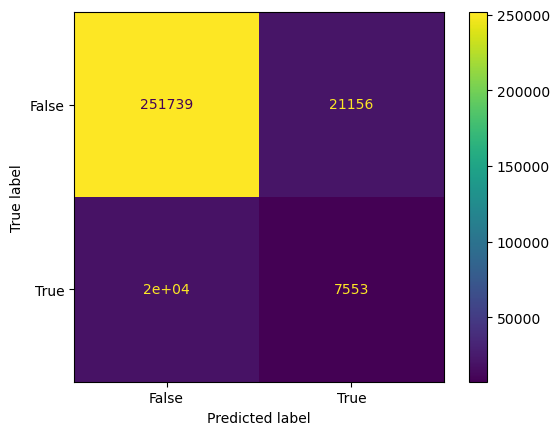

In [67]:
ConfusionMatrixDisplay.from_predictions(Y_trL, y_train_pred)

### Model Accuracy with respect to each class

In [109]:
from sklearn.metrics import classification_report
target_names=['class 5','Class Not 5']
print(classification_report(Y_trL, y_train_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 5       0.93      0.92      0.93    272895
 Class Not 5       0.26      0.28      0.27     27105

    accuracy                           0.86    300000
   macro avg       0.60      0.60      0.60    300000
weighted avg       0.87      0.86      0.87    300000



### Testing

In [69]:
x_test.shape

(10000, 784)

In [70]:
y_test.shape

(10000,)

In [91]:
some_digit=x_test.iloc[0,:].values

In [92]:
sgd_clf.predict([some_digit])

array([False])

##### Cross checking from the target to verify the image:

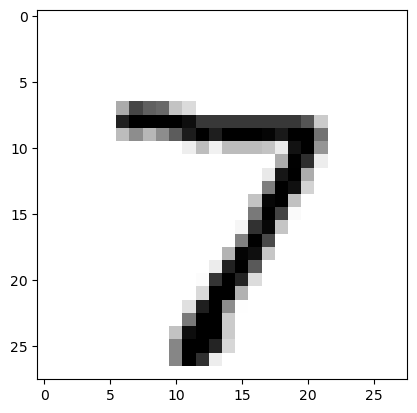

In [101]:
some_digit = x_test[0:1]
some_digit_arr = np.asarray(some_digit)
some_digit_image = some_digit_arr.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")


plt.show()

The image as seen from the target or label is 7 and not 5! This means the model has predicted accurately.

